# Анализ датасета Diabetes с использованием различных моделей машинного обучения

## 1. Подготовка данных

Загрузим датасет Diabetes и подготовим данные для анализа.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# TODO: Разделите данные на обучающую и тестовую выборки
# Подсказка: Используйте train_test_split из sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Выполните стандартизацию признаков
# Подсказка: Используйте StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Линейная регрессия

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# TODO: Создайте и обучите модель линейной регрессии
# Подсказка: Используйте LinearRegression
lr_model =LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# TODO: Сделайте предсказания и оцените качество модели
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(lr_pred, y_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Линейная регрессия:")
print(f"R^2: {lr_r2:.4f}")
print(f"MSE: {lr_mse:.4f}")

Линейная регрессия:
R^2: 0.0069
MSE: 2900.1936


# Логистическая регрессия

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Преобразование задачи в задачу классификации
y_binary = (y > np.median(y)).astype(int)
y_train_binary = (y_train > np.median(y_train)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# TODO: Создайте и обучите модель логистической регрессии
# Подсказка: Используйте LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train_binary)

# TODO: Сделайте предсказания и оцените качество модели
log_pred = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(log_pred, y_test_binary)
#log_proba = log_model.predict_proba(X_test_scaled)
log_auc = roc_auc_score(y_test_binary, log_pred)

print("\nЛогистическая регрессия:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"AUC: {log_auc:.4f}")


Логистическая регрессия:
Accuracy: 0.7416
AUC: 0.7407


### Отбор важных признаков

In [24]:
from sklearn.feature_selection import RFE

# TODO: Выполните отбор важных признаков
# Подсказка: Используйте RFE с LogisticRegression в качестве estimator
rfe = RFE(LogisticRegression(), n_features_to_select=4, step=1)
rfe.fit(X_train_scaled, y_train_binary)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe =  rfe.transform(X_test_scaled)

# TODO: Обучите логистическую регрессию на отобранных признаках
log_model_rfe = LogisticRegression()
log_model_rfe.fit(X_train_rfe, y_train_binary)

# TODO: Оцените качество модели на отобранных признаках
log_pred_rfe = log_model_rfe.predict(X_test_rfe)
log_accuracy_rfe = accuracy_score(log_pred_rfe, y_test_binary)
# log_proba_rfe = ...
log_auc_rfe = roc_auc_score(y_test_binary, log_pred_rfe)

print("\nЛогистическая регрессия (отобранные признаки):")
print(f"Accuracy: {log_accuracy_rfe:.4f}")
print(f"AUC: {log_auc_rfe:.4f}")


Логистическая регрессия (отобранные признаки):
Accuracy: 0.7528
AUC: 0.7520


# Метод опорных векторов (SVM)

In [31]:
from sklearn.svm import SVC

# TODO: Создайте и обучите SVM с линейным ядром
# Подсказка: Используйте SVC с kernel='linear'
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train_binary)

# TODO: Оцените качество модели SVM с линейным ядром
svm_linear_pred =svm_linear.predict(X_test_scaled)
svm_linear_accuracy = accuracy_score(svm_linear_pred, y_test_binary)
svm_linear_proba = ...
svm_linear_auc = roc_auc_score(y_test_binary, svm_linear_pred)

print("\nSVM с линейным ядром:")
print(f"Accuracy: {svm_linear_accuracy:.4f}")
print(f"AUC: {svm_linear_auc:.4f}")

# TODO: Создайте и обучите SVM с квадратичным ядром
# Подсказка: Используйте SVC с kernel='poly' и degree=2
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train_scaled, y_train_binary)

# TODO: Оцените качество модели SVM с квадратичным ядром
svm_poly_pred = svm_poly.predict(X_test_scaled)
svm_poly_accuracy = accuracy_score(svm_poly_pred, y_test_binary)
svm_poly_proba = ...
svm_poly_auc = roc_auc_score(y_test_binary, svm_poly_pred)

print("\nSVM с квадратичным ядром:")
print(f"Accuracy: {svm_poly_accuracy:.4f}")
print(f"AUC: {svm_poly_auc:.4f}")


SVM с линейным ядром:
Accuracy: 0.7191
AUC: 0.7179

SVM с квадратичным ядром:
Accuracy: 0.5169
AUC: 0.5144


# Визуализация результатов

### ROC-кривые
Построим ROC-кривые для сравнения эффективности моделей.

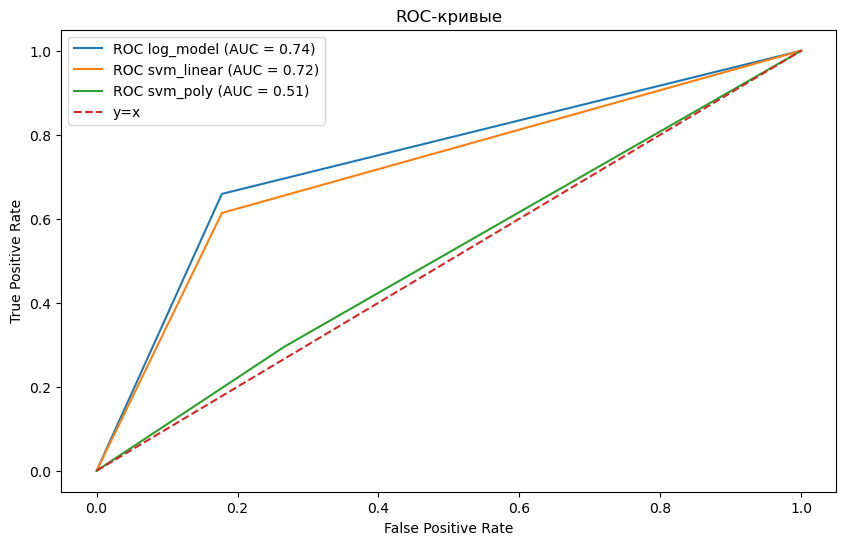

In [60]:
from sklearn.metrics import  RocCurveDisplay, auc, roc_curve

# TODO: Постройте ROC-кривые для логистической регрессии и обеих моделей SVM
# Подсказка: Используйте roc_curve для вычисления false positive rate и true positive rate

# Ваш код здесь для построения ROC-кривых

plt.figure(figsize=(10, 6), dpi=100)
#RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test_binary, ax=ax,name=log_model)
#RocCurveDisplay.from_estimator(svm_linear, X_test_scaled, y_test_binary, ax=ax,name=svm_linear)
#RocCurveDisplay.from_estimator(svm_poly, X_test_scaled, y_test_binary, ax=ax,name=svm_poly)
for clf, test in zip(["log_model", "svm_linear", "svm_poly"], [log_pred, svm_linear_pred,  svm_poly_pred] ):
    fpr, tpr, thresholds = roc_curve(y_test_binary, test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr, label='ROC %s (AUC = %0.2f)' % (clf, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="y=x")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()

plt.show()

### Разделяющие кривые
Визуализируем разделяющие кривые для SVM с линейным и квадратичным ядром.

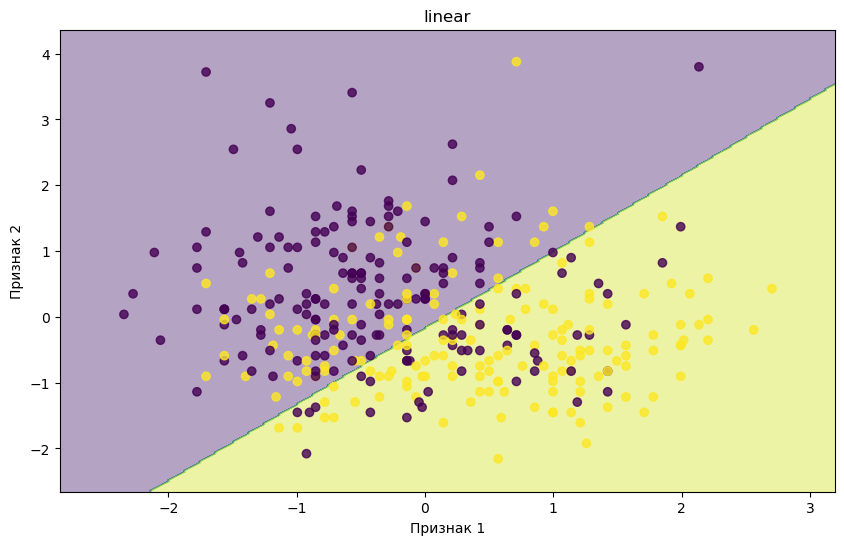

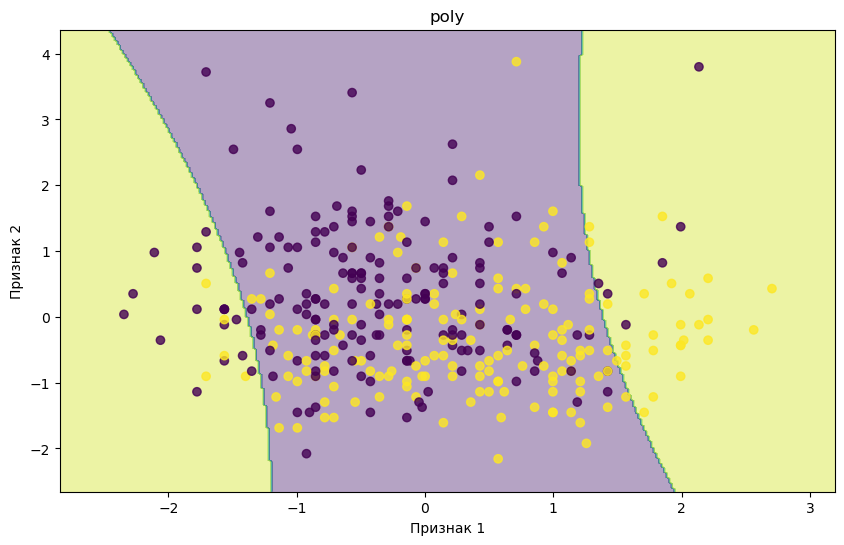

In [68]:
# Функция для визуализации разделяющей кривой
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(title)
    plt.show()

# Визуализация разделяющих кривых для SVM
X_vis = X_train_rfe[:, [1,2]]  # Используем только первые два признака для визуализации
y_vis = y_train_binary

# TODO: Создайте и обучите SVM с линейным ядром на X_vis и y_vis
svm_linear_vis = svm_linear
svm_linear_vis.fit(X_vis, y_vis)

# TODO: Визуализируйте разделяющую кривую для SVM с линейным ядром
plot_decision_boundary(svm_linear_vis, X_vis, y_vis, 'linear')

# TODO: Создайте и обучите SVM с квадратичным ядром на X_vis и y_vis
svm_poly_vis = svm_poly
svm_poly_vis.fit(X_vis, y_vis)

# TODO: Визуализируйте разделяющую кривую для SVM с квадратичным ядром
plot_decision_boundary(svm_poly_vis, X_vis, y_vis, 'poly')

#  Важность признаков

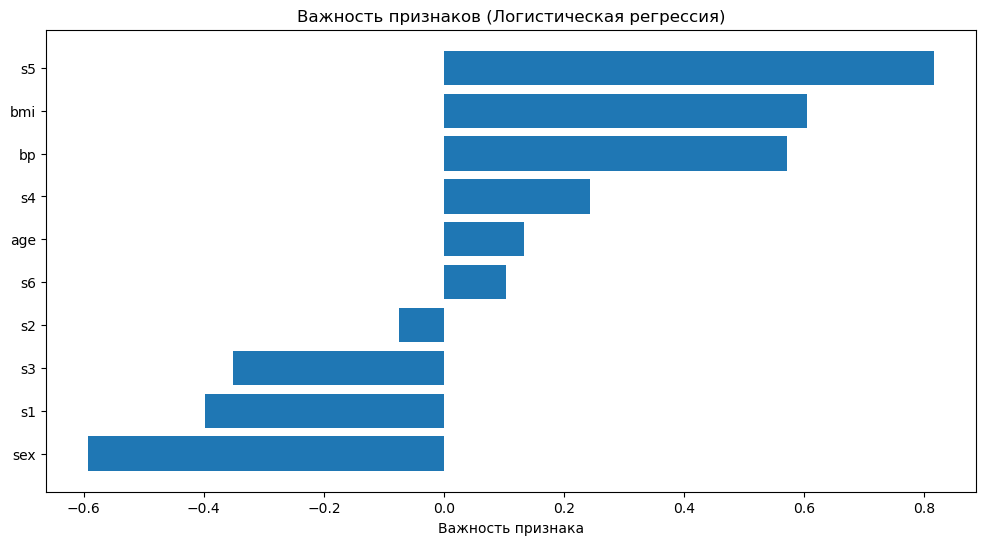

In [83]:
# TODO: Получите коэффициенты важности признаков из модели логистической регрессии
feature_importance = log_model.coef_[0]
feature_names = diabetes.feature_names
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Важность признака')
plt.title('Важность признаков (Логистическая регрессия)')
plt.show()